In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"phl_exoplanet_catalog_2019.csv")

In [2]:
df.shape

(4048, 112)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [4]:
df.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


In [5]:
df.isna().sum()

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df.columns

In [ ]:
column_names = df.columns.tolist()

print(column_names)

In [ ]:
pd.set_option('display.max_columns', None)

# Display the DataFrame with all columns
print(df.head())

In [ ]:
df.dtypes

In [ ]:
df['P_DETECTION'].value_counts()

In [ ]:
df['P_DETECTION'].isna().sum()

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap

# Your dataset
data = [k for k in range(1451)]

# Apply a logarithmic transformation to your data
log_transformed_data = [np.log(value) for value in data]

# Define the colormap using ListedColormap
cmap = ListedColormap(plt.cm.viridis(log_transformed_data))

# Assuming 'df' is your DataFrame with the data
pivot_table = df.pivot_table(index='P_YEAR', columns='P_DETECTION', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
#colors = ["#ff6666", "#ff9999", "#ffffff", "#66cc66"]
#cmap = ListedColormap(colors)
colors = [
   "#FFFFED", "#ff7f0e", "#2ca02c", "#9467bd", "#8c564b", "#e377c2",
   "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#c5b0d5",
   "#ff9896", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5", "#393b79",
   "#5254a3", "#6b6ecf", "#9c9ede", "#637939", "#8ca252", "#b5cf6b", "#cedb9c",
   "#8c6d31", "#bd9e39", "#e7ba52", "#e7cb94", "#843c39", "#ad494a", "#d6616b",
   "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6", "#3182bd", "#6baed6",
   "#9ecae1", "#c6dbef", "#e6550d", "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354",
   "#74c476", "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc", "#dadaeb",
   "#636363", "#969696", "#bdbdbd", "#d9d9d9", "#fee08b", "#ffffbf", "#d9ef8b",
   "#a6d96a", "#66bd63", "#1a9850", "#018571", "#006837", "#b3de69", "#ffffbf",
   "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9",
   "#bc80bd", "#ccebc5", "#ffed6f", "#bf5b17", "#984ea3", "#ff7f00", "#ffff33",
   "#a65628", "#f781bf", "#999999", "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3",
   "#a6d854", "#ffd92f", "#e5c494", "#b3b3cc", "#8dd3c7", "#bebada", "#fb8072",
   "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5",
   "#ffed6f", "#bf5b17", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf",
   "#999999", "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f",
   "#e5c494", "#b3b3cc", "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3",
   "#fdb462", "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
   "#bf5b17", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999",
   "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494",
   "#b3b3cc", "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
   "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bf5b17",
   "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5",
   "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3cc",
   "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69",
   "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bf5b17", "#984ea3",
   "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5", "#fc8d62",
   "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3cc", "#8dd3c7",
   "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
   "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bf5b17", "#984ea3", "#ff7f00",
   "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5", "#fc8d62", "#8da0cb",
   "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3cc", "#8dd3c7", "#ffffb3",
   "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9",
   "#bc80bd", "#ccebc5", "#ffed6f", "#bf5b17", "#984ea3", "#ff7f00", "#ffff33",
   "#a65628", "#f781bf", "#999999", "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3",
   "#a6d854", "#ffd92f", "#e5c494", "#b3b3cc", "#8dd3c7", "#ffffb3", "#bebada","#d62728",
   "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd",
   "#ccebc5", "#ffed6f", "#bf5b17", "#984ea3", "#ff7f00", "#ffff33", "#a65628",
   "#f781bf", "#999999", "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
   "#ffd92f", "#e5c494", "#b3b3cc", "#8dd3c7", "#ffffb3"
]

#cmap = ListedColormap(colors)
sns.heatmap(pivot_table,cmap=cmap,vmin = 0,vmax = 1500, annot=True,fmt='d', linewidths=0.5)
plt.title('Planetary Detection Methods Over the Years')
plt.xlabel('Planetary Detection Method')
plt.ylabel('Year')
plt.show()

In [ ]:
pivot_table

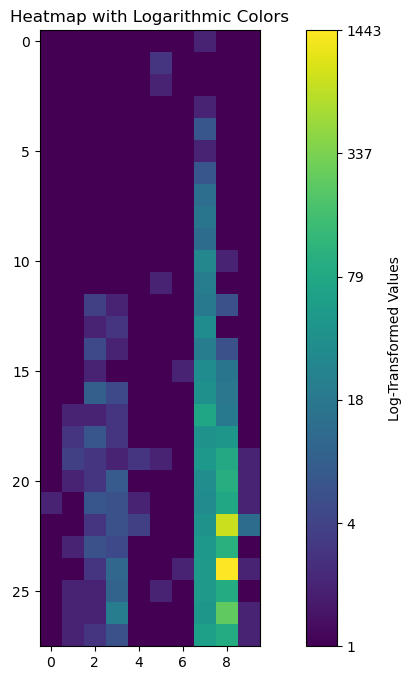

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate your 2D matrix (example)
matrix = df.pivot_table(index='P_YEAR', columns='P_DETECTION', aggfunc='size', fill_value=0)  # Example matrix, adjust as needed

# Apply a logarithmic transformation to the matrix
log_transformed_matrix = np.log(matrix.add(1))

# Create a custom colormap for the logarithmic values
cmap = plt.cm.viridis

# Create a heatmap
plt.figure(figsize=(12,12))
im = plt.imshow(log_transformed_matrix, cmap=cmap)

# Add a colorbar to show the original values corresponding to colors
cbar = plt.colorbar(im, label='Log-Transformed Values')

# Set the tick labels of the colorbar to show the original values
tick_values = np.linspace(log_transformed_matrix.min().min(), log_transformed_matrix.max().max(), num=6)
cbar.set_ticks(tick_values)
cbar.set_ticklabels(np.round(np.exp(tick_values)).astype(int))

plt.title('Heatmap with Logarithmic Colors')
plt.show()

In [15]:
tick_values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.13862944, 0.27725887, 0.43944492, 0.60890449, 0.27725887,
        0.21972246, 0.13862944, 0.86081302, 1.45489591, 0.51298987],
       [0.27725887, 0.55451774, 0.87888983, 1.21780898, 0.55451774,
        0.43944492, 0.27725887, 1.72162604, 2.90979182, 1.02597974],
       [0.41588831, 0.83177662, 1.31833475, 1.82671346, 0.83177662,
        0.65916737, 0.41588831, 2.58243906, 4.36468774, 1.53896961],
       [0.55451774, 1.10903549, 1.75777966, 2.43561795, 1.10903549,
        0.87888983, 0.55451774, 3.44325207, 5.81958365, 2.05195949],
       [0.69314718, 1.38629436, 2.19722458, 3.04452244, 1.38629436,
        1.09861229, 0.69314718, 4.30406509, 7.27447956, 2.56494936]])

In [13]:
tick_values

array([0.        , 1.45489591, 2.90979182, 4.36468774, 5.81958365,
       7.27447956])

In [12]:
log_transformed_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69314718, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.09861229, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.69314718, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69314718, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.94591015, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69314718, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.94591015, 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
df['S_AGE'].isna().sum()

In [ ]:
df['S_METALLICITY'].isna().sum()

In [ ]:
df['S_AGE']

In [ ]:
correlation_coefficient = df['S_AGE'].corr(df['S_METALLICITY'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='S_AGE', y='S_METALLICITY', data=df)
plt.title(f'Age vs. Metallicity (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Host Star Age')
plt.ylabel('Exoplanet Metallicity')
plt.show()


In [ ]:
df['S_AGE'].describe()

In [ ]:
plt.plot(df['S_AGE'],df['S_METALLICITY'])
plt.xlabel("Host star age")
plt.ylabel("Exoplanet metallicity")
plt.title("")

In [ ]:
import plotly.express as px
fig4 = px.density_heatmap(df,x='S_AGE',y='S_METALLICITY')
fig4

In [ ]:
correlation_coefficient = df['S_AGE'].corr(df['S_METALLICITY'])
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='S_AGE', y='S_METALLICITY', data=df)
plt.xlabel('Host Star Age')
plt.ylabel('Exoplanet Metallicity')
plt.title(f'Age vs. Metallicity (Correlation: {correlation_coefficient:.2f})')
plt.show()


Patterns that align with our understanding of stellar evolution and planet formation can be identified through the analysis of data related to exoplanets and their host stars. Here are some patterns and observations that align with our current understanding:

1. **Metallicity and Planet Formation**:
   - Planets tend to form more frequently around metal-rich stars. Higher metallicity provides more solid material for core formation.

2. **Stellar Age and Planet Formation**:
   - Younger stars often have more active protoplanetary disks, which can lead to the formation of planets. Older stars may have less material available for planet formation. However, this relationship is complex, as some planets may continue to form or migrate over long periods.

3. **Exoplanet Types**:
   - Gas giants (like Jupiter) are often found farther from their host stars, while rocky planets (like Earth) are closer. This aligns with our understanding of the frost line, where volatile compounds freeze and are more abundant farther from the star, allowing gas giants to form there.

5. **Multiple Star Systems**:
   - Planets in multiple star systems, such as binary or trinary stars, can have complex and unique orbital dynamics. Understanding these patterns can provide insights into how planets can form and maintain stable orbits in such systems.

6. **Stellar Metallicity and Stellar Evolution**:
   - Stellar metallicity is related to the age and evolutionary stage of stars. Older stars with low metallicity are often found in globular clusters, while younger stars with higher metallicity are found in the galactic disk. This can provide clues about the conditions for planet formation in different galactic environments.

7. **Planetary Atmospheres**:
   - The composition and structure of exoplanet atmospheres can be indicative of their formation history and evolution. For instance, a lack of hydrogen and helium in the atmosphere of a gas giant suggests it may have undergone atmospheric loss or differentiation.

8. **Planetary Migration**:
   - Some exoplanets exhibit patterns of migration, where they move from their original formation locations. This can be due to interactions with the protoplanetary disk, other planets, or tidal forces from the host star.

It's important to note that while these patterns align with our current understanding of stellar evolution and planet formation, the field of exoplanet research is continually evolving, and new discoveries can challenge or refine our theories. Therefore, ongoing observations and analyses are essential to further our understanding of these complex processes.